In [1]:
import tiffile
import matplotlib.pyplot as plt
import numpy as np
import glob 

In [2]:
path_code_dict = { 'Northern Mesoamerican Mangrove': '19',
                 'Guayaquil flooded grasslands':'132', 'Central Andean dry puna':'133', 'Lake':'139',
                 'Cerrado': '74', 'High Monte':'126', 'Rock and Ice': '99'}


In [37]:
path_code_dict = { 'Northern Mesoamerican Mangrove': '19',
                 'Guayaquil flooded grasslands': '132',
                 'Central Andean dry puna': '133'}


In [38]:
# 'Rock and Ice': '99',

In [39]:
# 

Text(0.5, 0.98, 'Spectral Profile of Herbaceous Vegetation Across Ecoregions')

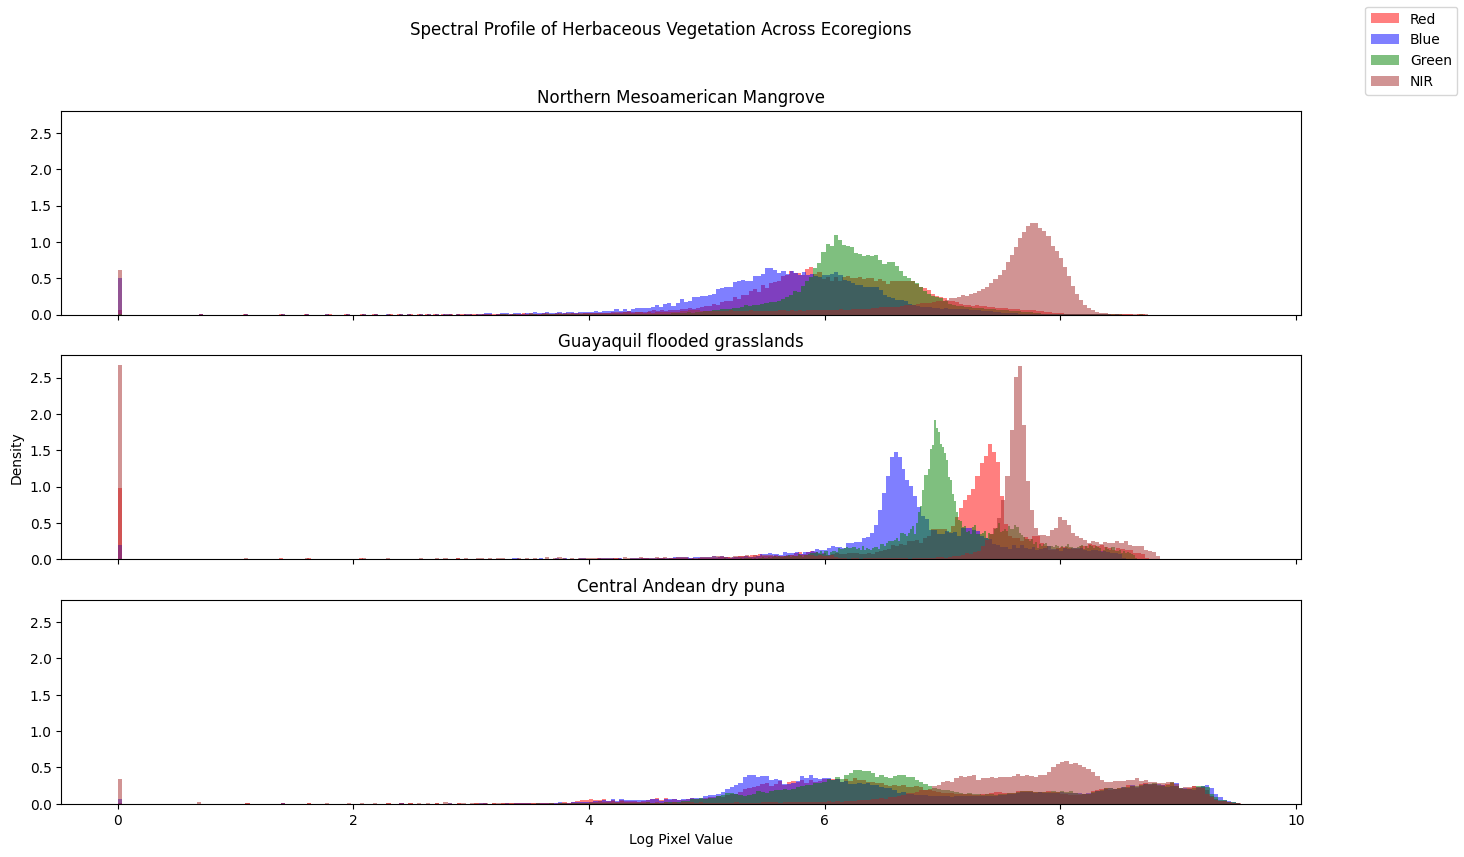

In [40]:
land_class_code = '90'
resultDict = {}
fig, axs = plt.subplots(len(path_code_dict.keys()), 1, figsize=(16, 9), sharex=True, sharey=True)


for idx, k in enumerate(path_code_dict.keys()):
    region_code = path_code_dict[k]
    class_code = land_class_code
    path_string = f'latamSatData/*/{region_code}/{land_class_code}/*'
    tifs = glob.glob(path_string)

    reds = []
    blues = []
    greens = []
    nirs = []
    swirs = []
    aerosols=[]

    for t in tifs:
        _t = tiffile.imread(t)
        #_t = np.clip((_t/np.max(_t)*255).astype(int), 0, 255)
        _swir = _t[:,:,10].flatten()
        _aero = _t[:,:,0].flatten()

        _nir = _t[:,:,7].flatten()
        _r = _t[:,:,3].flatten()
        _b = _t[:,:,1].flatten()
        _g = _t[:,:,2].flatten()

        reds.append(_r)
        greens.append(_g)
        blues.append(_b)
        nirs.append(_nir)
        swirs.append(_swir)
        aerosols.append(_aero)

    resultDict[k] = [reds, greens, blues, nirs, swirs]

    
    axs[idx].set_title(k)
    #axs[idx].hist(np.array(aerosols).flatten(), bins=256,  alpha=0.5, density=True, label='Aerosols', color='Aqua')
    axs[idx].hist(np.log(np.array(reds).flatten()), bins=256,  alpha=0.5, density=True, label='Red', color='Red')
    axs[idx].hist(np.log(np.array(blues).flatten()), bins=256,  alpha=0.5, density=True, label='Blue', color='Blue')
    axs[idx].hist(np.log(np.array(greens).flatten()), bins=256, alpha=0.5, density=True, label='Green', color='Green')
    axs[idx].hist(np.log(np.array(nirs).flatten()), bins=256, alpha=0.5, density=True, label='NIR', color='Brown')
    #axs[idx].hist(np.array(swirs).flatten(), bins=256, alpha=0.5, density=True, label='SWIR', color='Purple')

handles, labels = axs[idx].get_legend_handles_labels()
axs[1].set_ylabel('Density')
axs[-1].set_xlabel('Log Pixel Value')

fig.legend(handles, labels, loc='upper right')

plt.suptitle('Spectral Profile of Herbaceous Vegetation Across Ecoregions')



In [43]:
import random
random.sample([1,5,2,15,6,12,5], 3)

[2, 5, 15]

In [45]:
def multispectral_to_rgb(raster, optical_maximum = 2000):

  r = raster[:, :, 3]
  g = raster[:, :, 2]
  b = raster[:, :, 1]

  rgb_raster = np.stack([r, g, b], axis=2)

  #cast to uint and scale to 0/255

  rgb_raster = rgb_raster/optical_maximum
  rgb_raster = np.around(rgb_raster*255)
  rgb_raster = np.clip(rgb_raster, 0, 255).astype(int)
  return rgb_raster

In [93]:
classDictionary = {30: 'Herbaceous Vegetation',
20: 'Shrubs',
40: 'Agricultural Land',
50: 'Urban Areas',
60: 'Bare Earth/Sparse \n Vegetation',
70: 'Snow and Ice',
80: 'Permanent Water Bodies',
90: 'Herbaceous Wetland',
100: 'Moss and Lichen',
111: 'Closed Evergreen Needle \n Leaf Forest',
112: 'Closed Evergreen Broad \n Leaf Forest',
113: 'Closed Deciduous Needle \n Leaft Forest',
114: 'Closed Deciduous Broad \n Leaf Forest',
115: 'Closed Mixed Forest',
116: 'Other Closed Forest',
121: 'Open Evergreen Needle \n Leaf Forest',
122: 'Open Evergreen Broad \n Leaf Forest',
123: 'Open Deciduous Needle \n Leaf Forest',
124: 'Open Deciduous Broad \n Leaf Forest',
125: 'Open Mixed Forest',
126: 'Other Open Forest',
200: 'Oceans, Seas'}

In [68]:
classDictionary[k]

'Herbaceous Vegetation'

findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not

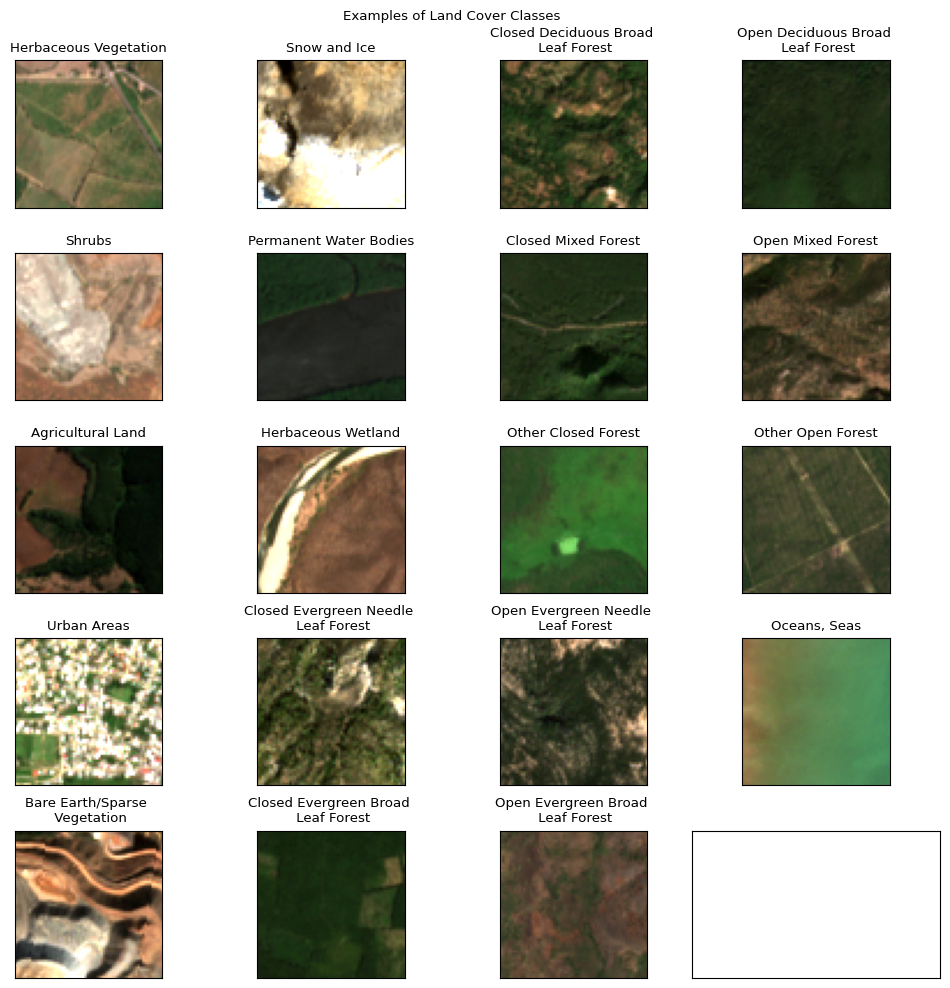

In [106]:
resultdict = {}
for idx, k in enumerate(classDictionary.keys()):
    #region_code = path_code_dict[k]
    class_code = classDictionary[k]
    path_string = f'latamSatData/*/*/{k}/*'
    tifs = glob.glob(path_string)
    try:
        tifs = random.sample(tifs, 1)
        images_rgb = []
        for _t in tifs:
            img = multispectral_to_rgb(tiffile.imread(_t))
            images_rgb.append(img)
        resultdict[k] = images_rgb
    except:
        pass

fig, axs = plt.subplots(5, 4, sharey=True, sharex=True, figsize=(10,10))
font = {'size'   : 8}

plt.rc('font', **font)

for idx, k in enumerate(resultdict.keys()):
    y = idx//5
    x = idx % 5
    imglist = resultdict[k]
    axs[x,y].set_title(classDictionary[k])
    axs[x, y].imshow(resultdict[k][0])
    axs[x, y].set_xticks([])
    axs[x, y].set_yticks([])
fig.suptitle('Examples of Land Cover Classes')
plt.tight_layout()

In [91]:
len(resultdict.keys()) 

19

Text(0.5, 0.98, 'Examples of Land Cover Classe')

findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not

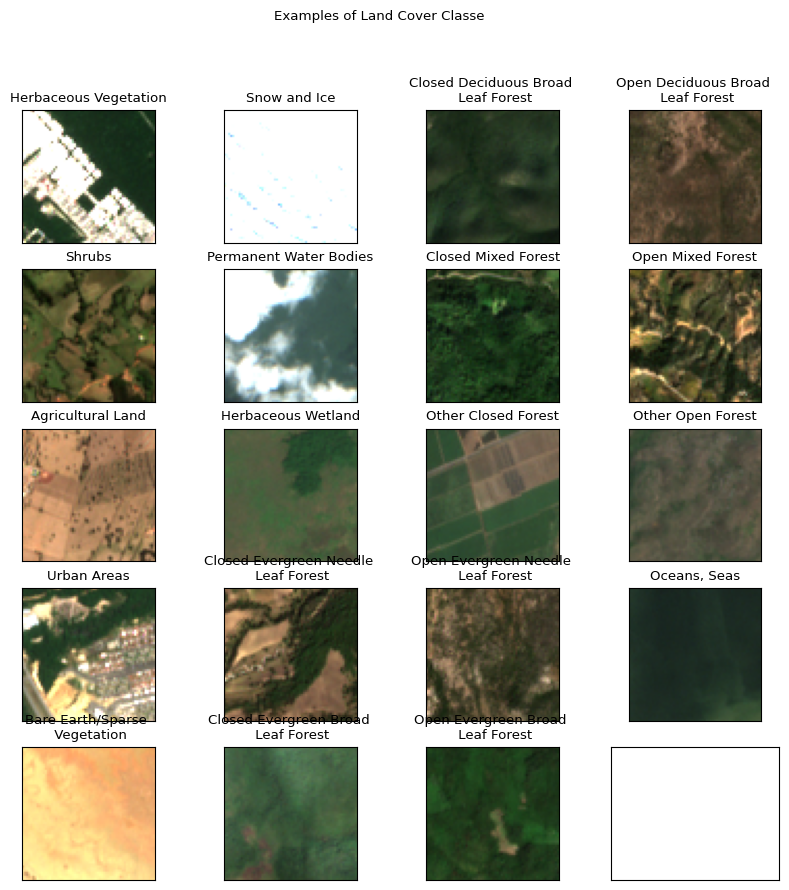

In [41]:
ecoRegionsPattern = 'latamSatData/*/*'
LULCPattern = 'latamSatData/*/*/*'


In [8]:
regions = glob.glob(ecoRegionsPattern)

In [9]:
types = glob.glob(LULCPattern)

In [10]:
typeCodes = []

for t in types:
    code = t.split('/')[-1]

    if code not in typeCodes:
        typeCodes.append(code)
    

In [11]:
regions[1].split('/')

['latamSatData', 'DownloadedDataset', '61']

In [12]:
regionCodes = []

for r in regions:
    code = r.split('/')[-1]

    if code not in regionCodes:
        regionCodes.append(code)
    

In [13]:
typeCodes.sort()

In [14]:
regionCodes.sort()

In [15]:
xx, yy = np.meshgrid(typeCodes, regionCodes)

In [16]:
xx[0]

array(['111', '112', '114', '115', '116', '121', '122', '124', '125',
       '126', '20', '200', '30', '40', '50', '60', '70', '80', '90'],
      dtype='<U3')

In [17]:
len(typeCodes)

19

In [18]:
len(regionCodes)

159

In [19]:
valArray  = np.zeros((len(regionCodes), len(typeCodes)))

In [20]:
for r_idx, r in enumerate(regionCodes):
    for c_idx, c in enumerate(typeCodes):
        path_string = f'latamSatData/*/{r}/{c}/*'
        num_imgs = len(glob.glob(path_string))
        valArray[r_idx, c_idx] = num_imgs
        

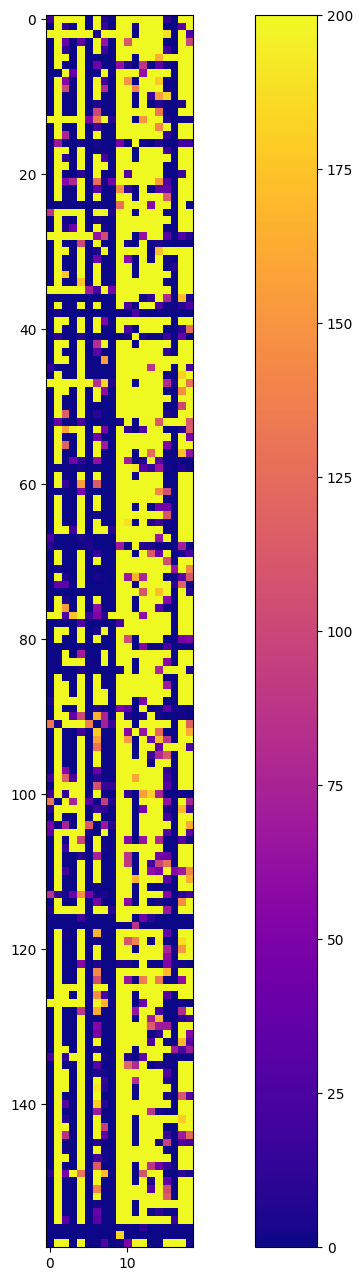

In [21]:
plt.figure(figsize = (16, 16))
plt.imshow(valArray, cmap='plasma')
plt.colorbar()